In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import os
import matplotlib
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [2]:

sns.set_context("paper")

color_set=['deep','muted','pastel','bright','dark','colorblind']
sns.set_palette(color_set[1])





large=12
med=9
small=6
ss=10
sss=8
ssss=6



matplotlib.rcParams['figure.figsize']=(3.2,2.8)
matplotlib.rcParams['figure.dpi'] = 600
 
matplotlib.rcParams['font.sans-serif'] = ['Arial']   
matplotlib.rcParams['font.family']='sans-serif'
matplotlib.rcParams['font.style']='normal'   # normal (or roman), italic or oblique
matplotlib.rcParams['font.weight']='bold'   # normal bold bolder lighter, 100, 200, 300, ..., 900
matplotlib.rcParams["axes.labelweight"] = "bold"

matplotlib.rcParams['axes.titlesize'] =sss
#matplotlib.rcParams['axes.titlepad'] =-0.5
matplotlib.rcParams['legend.fontsize'] =ss
matplotlib.rcParams['axes.labelsize'] =ss
matplotlib.rcParams['xtick.labelsize'] =ss
matplotlib.rcParams['ytick.labelsize'] = ss
matplotlib.rcParams['figure.titlesize'] =sss



matplotlib.rcParams['xtick.major.width'] = 0.6
matplotlib.rcParams['ytick.major.width'] = 0.6

matplotlib.rcParams['xtick.major.size'] = 1.3
matplotlib.rcParams['ytick.major.size'] = 1.3

matplotlib.rcParams['xtick.major.pad'] = 1.5
matplotlib.rcParams['ytick.major.pad'] = 1.5



matplotlib.rcParams['axes.linewidth'] = 0.6

matplotlib.rcParams['lines.linewidth'] = 1.0
#matplotlib.rcParams['lines.markersize'] = 1.2

scatter_s=20


ref_line_color=['#4d4d4d', 'red']
ref_line_size=0.8


#matplotlib.rcParams['xtick.direction'] = 'in'

In [3]:

data_train = pd.read_excel('data_train.xlsx')
data_test = pd.read_excel('data_test.xlsx')
data_final_test = pd.read_excel('data_final_test.xlsx')

In [4]:

#print(data_train.info())
#print(data_test.info())

#data_train = data_train.astype(float)
#data_test = data_test.astype(float)

In [5]:

X_train = data_train.drop(['AVE_R', 'AVE_E', 'AVE_M', 'MSD_R', 'MSD_E', 'MSD_M','Formation_Energy'], axis=1)
y_train = data_train.iloc[:,0]

X_col = X_train.columns


X_test = data_test.drop(['AVE_R', 'AVE_E', 'AVE_M', 'MSD_R', 'MSD_E', 'MSD_M','Formation_Energy'], axis=1)
y_test = data_test.iloc[:,0]


X_final_test = data_final_test.drop(['AVE_R', 'AVE_E', 'AVE_M', 'MSD_R', 'MSD_E', 'MSD_M','Formation_Energy'], axis=1)
y_final_test = data_final_test.iloc[:,0]

In [6]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()

scaler.fit(X_train)  

X_train_standard = scaler.transform(X_train)
X_test_standard = scaler.transform(X_test)

X_train_standard = pd.DataFrame(X_train_standard,columns=X_col)
X_test_standard = pd.DataFrame(X_test_standard,columns=X_col)

In [7]:
X_train_standard

,Mo_P,Ru_P,Rh_P,W_P,Ir_P,S_MIX,H_MIX
0,-0.987393,1.477909,-0.393018,0.866900,-0.947659,0.187799,0.649940
1,0.893355,0.223450,-0.393018,0.253165,-0.947659,1.315755,-0.422817
2,0.893355,-0.403779,0.839979,-0.360569,-0.947659,1.043415,-0.398436
3,-0.987393,-0.403779,-0.393018,1.480634,0.270216,0.826387,-0.166818
4,-0.987393,0.850680,-0.393018,-0.974303,1.488091,0.187799,1.259461
...,...,...,...,...,...,...,...
155,1.520272,-1.031008,0.223481,-1.588038,0.879154,-0.742426,-1.489479
156,0.893355,-1.658237,0.223481,-0.360569,0.879154,0.113190,-1.355384
157,1.520272,-1.658237,-1.009516,0.253165,0.879154,-0.742426,-1.751573
158,-1.614309,-0.403779,0.839979,1.480634,-0.338721,-0.376178,0.820606


In [8]:

X_train_standard_np = X_train_standard.values
X_test_standard_np = X_test_standard.values
y_train_np = y_train.values
y_test_np = y_test.values
y_final_test_np = y_final_test.values

Mean Absolute Error MAE: 0.005662342091175802
test rmse scores :  0.007264448175712839
test R2 scores :  0.9788368320273495


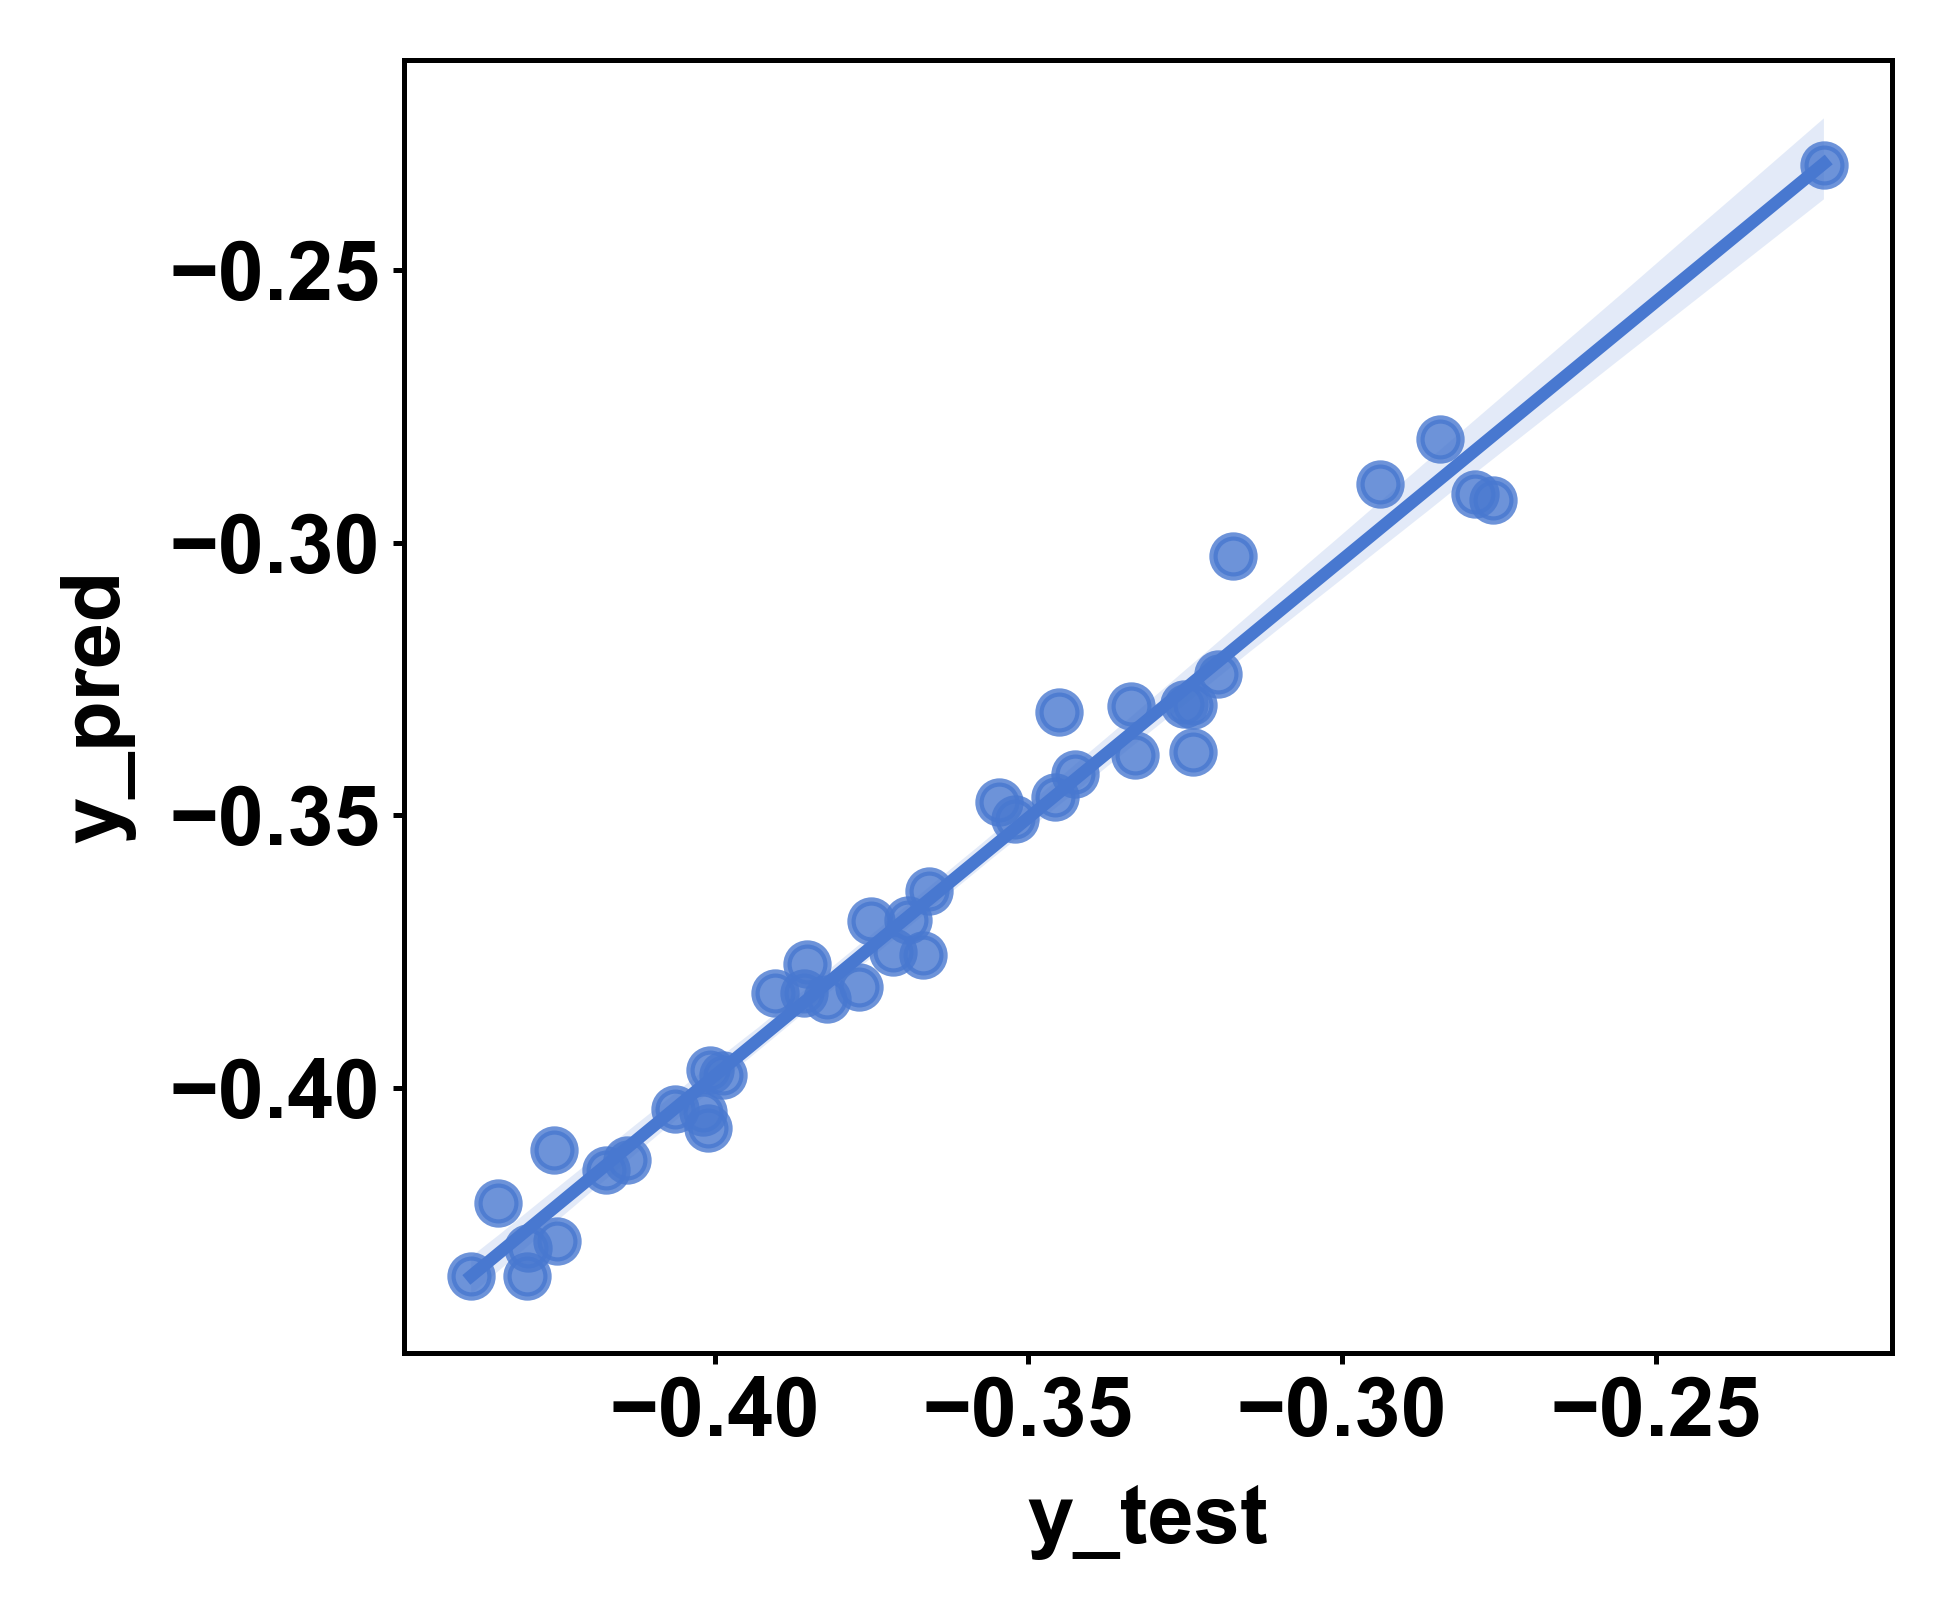

In [9]:

from sklearn.linear_model import Ridge
Ridge_default = Ridge()
Ridge_default.fit(X_train_standard_np,y_train_np)
y_pred_default=Ridge_default.predict(X_test_standard_np)


x_1,y_1=pd.Series(y_test_np,name='y_test'),pd.Series(y_pred_default,name='y_pred')
sns.regplot(x=x_1,y=y_1)
plt.show


#rmse_log = np.sqrt(mean_squared_error(np.log(y_test),np.log(abs(y_pred))))
rmse = np.sqrt(mean_squared_error(y_test_np,y_pred_default))
r2 = r2_score(y_test_np,y_pred_default)


print(f'Mean Absolute Error MAE: {mean_absolute_error(y_test_np,y_pred_default)}')
print ('test rmse scores : ',rmse)
print ('test R2 scores : ',r2)

In [10]:
print(Ridge_default.get_params())

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}


In [11]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold


alphas = np.logspace(-6, 6, 13)
r2_scores_totle = []
alpha_storage = []
screen_data =[]
kf = KFold(n_splits=5, shuffle=True, random_state=1 )

for i in alphas:
    RI_KF = Ridge(alpha=i)
    alpha_storage.append(i)
    r2_scores = []
    for train, test in kf.split(X_train_standard_np):
        X_train_k, X_test_k = X_train_standard_np[train], X_train_standard_np[test]
        y_train_k, y_test_k = y_train_np[train], y_train_np[test]
        RI_KF.fit(X_train_k,y_train_k)
        y_pred_k=RI_KF.predict(X_test_k)
        r2 = r2_score(y_test_k,y_pred_k)
        r2_scores.append(r2)
    print(i)
    print(r2_scores)
    average = np.mean(r2_scores)
    screen_data.append({i:average})
    r2_scores_totle.append(r2_scores)

max_data = max(screen_data, key=lambda x: list(x.values())[0])
x=float(list(max_data.keys())[0])
print(x)

1e-06
[0.977832018282129, 0.9696897506364247, 0.9635867551853918, 0.9475455840942087, 0.9645791538399269]
1e-05
[0.9778320063557875, 0.9696897483130962, 0.9635867543190713, 0.947545606669066, 0.9645791422970035]
0.0001
[0.9778318870894743, 0.9696897250760235, 0.9635867456509891, 0.9475458324137439, 0.9645790268663137]
0.001
[0.9778306941366306, 0.9696894923266423, 0.9635866584825985, 0.9475480894712309, 0.9645778724139367]
0.01
[0.9778187356917467, 0.9696871270236539, 0.963585738118843, 0.9475706211615739, 0.9645663133643219]
0.1
[0.9776963137688959, 0.969659748666172, 0.9635717426597494, 0.9477920938440973, 0.9644492922566111]
1.0
[0.976236128588603, 0.9690630728281472, 0.9630202709077483, 0.9496624518801279, 0.9631557439586343]
10.0
[0.956882063757237, 0.9523144361927414, 0.9447409940415901, 0.9529783946829566, 0.946563821715373]
100.0
[0.8317526569511124, 0.8010806443337727, 0.7919191352582233, 0.845554238446538, 0.8036117280785158]
1000.0
[0.3031569734122447, 0.2566799871542391, 0.

In [12]:

data = pd.read_excel('data_final.xlsx')


#data = data.astype(float)
#data.info()


X_all = data.drop(['AVE_R', 'AVE_E', 'AVE_M', 'MSD_R', 'MSD_E', 'MSD_M','Formation_Energy'], axis=1)
y_all = data.iloc[:,0]


X_all_np=X_all.values
y_all_np=y_all.values

In [13]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler_all = StandardScaler()
RI_all = Ridge(alpha=float(list(max_data.keys())[0]))


feature_imp_set=[]


train_rmse_scores = []
train_r2_scores = []
train_mae_scores = []

test_rmse_scores = []
test_r2_scores = []
test_mae_scores = []

final_test_rmse_scores = []
final_test_r2_scores = []
final_test_mae_scores = []


n = 20


for i in range(n):
    X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size=0.2, shuffle=True, random_state=i)

    
    scaler_all.fit(X_all_train)
    X_all_train_standard = scaler_all.transform(X_all_train)
    X_all_test_standard = scaler_all.transform(X_all_test)
    X_final_test_standard_all = scaler_all.transform(X_final_test)
    
    RI_all.fit(X_all_train_standard, y_all_train)

    y_all_train_pred = RI_all.predict(X_all_train_standard)
    train_rmse = np.sqrt(mean_squared_error(y_all_train, y_all_train_pred))
    train_rmse_scores.append(train_rmse)
    train_r2 = r2_score(y_all_train, y_all_train_pred)
    train_r2_scores.append(train_r2)
    train_mae = mean_absolute_error(y_all_train, y_all_train_pred)
    train_mae_scores.append(train_mae)

    y_all_test_pred = RI_all.predict(X_all_test_standard)
    test_rmse = np.sqrt(mean_squared_error(y_all_test, y_all_test_pred))
    test_rmse_scores.append(test_rmse)
    test_r2 = r2_score(y_all_test, y_all_test_pred)
    test_r2_scores.append(test_r2)
    test_mae = mean_absolute_error(y_all_test, y_all_test_pred)
    test_mae_scores.append(test_mae)

    y_final_test_pred_all = RI_all.predict(X_final_test_standard_all)
    test_rmse = np.sqrt(mean_squared_error(y_final_test_np, y_final_test_pred_all))
    final_test_rmse_scores.append(test_rmse)
    test_r2 = r2_score(y_final_test_np, y_final_test_pred_all)
    final_test_r2_scores.append(test_r2)
    test_mae = mean_absolute_error(y_final_test_np, y_final_test_pred_all)
    final_test_mae_scores.append(test_mae)




results_dict = {
    'method': ['RI'] * (3 * n),
    'set_type': ['Train'] * n + ['Test'] * n + ['Final_Test'] * n,
    'MAE': train_mae_scores + test_mae_scores + final_test_mae_scores,
    'RMSE': train_rmse_scores + test_rmse_scores + final_test_rmse_scores,
    'R2': train_r2_scores + test_r2_scores + final_test_r2_scores
}
results_df = pd.DataFrame(results_dict)

excel_filename = 'model_evaluation_results_7fea.xlsx'
results_df.to_excel(excel_filename, index=False)

In [14]:

print('train set')
print(f'Average MAE score: {np.mean(train_mae_scores):.4f} ± {np.std(train_mae_scores):.4f}')
print(f'Average RMSE score: {np.mean(train_rmse_scores):.4f} ± {np.std(train_rmse_scores):.4f}')
print(f'Average R2 score: {np.mean(train_r2_scores):.4f} ± {np.std(train_r2_scores):.4f}')

print('\ntest set:')
print(f'Average MAE score: {np.mean(test_mae_scores):.4f} ± {np.std(test_mae_scores):.4f}')
print(f'Average RMSE score: {np.mean(test_rmse_scores):.4f} ± {np.std(test_rmse_scores):.4f}')
print(f'Average R2 score: {np.mean(test_r2_scores):.4f} ± {np.std(test_r2_scores):.4f}')

print('\nindependent test set')
print(f'Average MAE score: {np.mean(final_test_mae_scores):.4f} ± {np.std(final_test_mae_scores):.4f}')
print(f'Average RMSE score: {np.mean(final_test_rmse_scores):.4f} ± {np.std(final_test_rmse_scores):.4f}')
print(f'Average R2 score: {np.mean(final_test_r2_scores):.4f} ± {np.std(final_test_r2_scores):.4f}')

print(f'\nResults have been saved to {excel_filename}')


print('\nDataFrame preview:')
print(results_df.head())



print('best test set')
min_mae = min(test_mae_scores)
min_mae_index = test_mae_scores.index(min_mae)
print('min MAE score:', min_mae, '    ', 'random_state=', min_mae_index)

min_rmse = min(test_rmse_scores)
min_rmse_index = test_rmse_scores.index(min_rmse)
print('min RMSE score:', min_rmse, '    ', 'random_state=', min_rmse_index)

max_r2 = max(test_r2_scores)
max_r2_index = test_r2_scores.index(max_r2)
print('max R2 score:', max_r2, '    ', 'random_state=', max_r2_index)

print('independent test set')
final_min_mae = min(final_test_mae_scores)
final_min_mae_index = final_test_mae_scores.index(final_min_mae)
print('min MAE score:', final_min_mae, '    ', 'random_state=', final_min_mae_index)

final_min_rmse = min(final_test_rmse_scores)
final_min_rmse_index = final_test_rmse_scores.index(final_min_rmse)
print('min RMSE score:', final_min_rmse, '    ', 'random_state=', final_min_rmse_index)

final_max_r2 = max(final_test_r2_scores)
final_max_r2_index = final_test_r2_scores.index(final_max_r2)
print('max R2 score:', final_max_r2, '    ', 'random_state=', final_max_r2_index)

train set
Average MAE score: 0.0056 ± 0.0001
Average RMSE score: 0.0068 ± 0.0001
Average R2 score: 0.9718 ± 0.0017

test set:
Average MAE score: 0.0057 ± 0.0005
Average RMSE score: 0.0070 ± 0.0005
Average R2 score: 0.9711 ± 0.0073

independent test set
Average MAE score: 0.0061 ± 0.0002
Average RMSE score: 0.0076 ± 0.0001
Average R2 score: 0.9158 ± 0.0031

Results have been saved to model_evaluation_results_7fea.xlsx

DataFrame preview:
  method set_type       MAE      RMSE        R2
0     RI    Train  0.005632  0.006866  0.970425
1     RI    Train  0.005569  0.006717  0.968861
2     RI    Train  0.005620  0.006798  0.970969
3     RI    Train  0.005599  0.006859  0.970482
4     RI    Train  0.005623  0.006887  0.969322
best test set
min MAE score: 0.005020929616568392      random_state= 7
min RMSE score: 0.006258798051121493      random_state= 7
max R2 score: 0.9801996246126914      random_state= 4
independent test set
min MAE score: 0.005736811845400387      random_state= 11
min RMSE 

train Mean Absolute Error MAE: 0.005209041543313401
train rmse scores :  0.0063997620395417855
train R2 scores :  0.9759346954019285


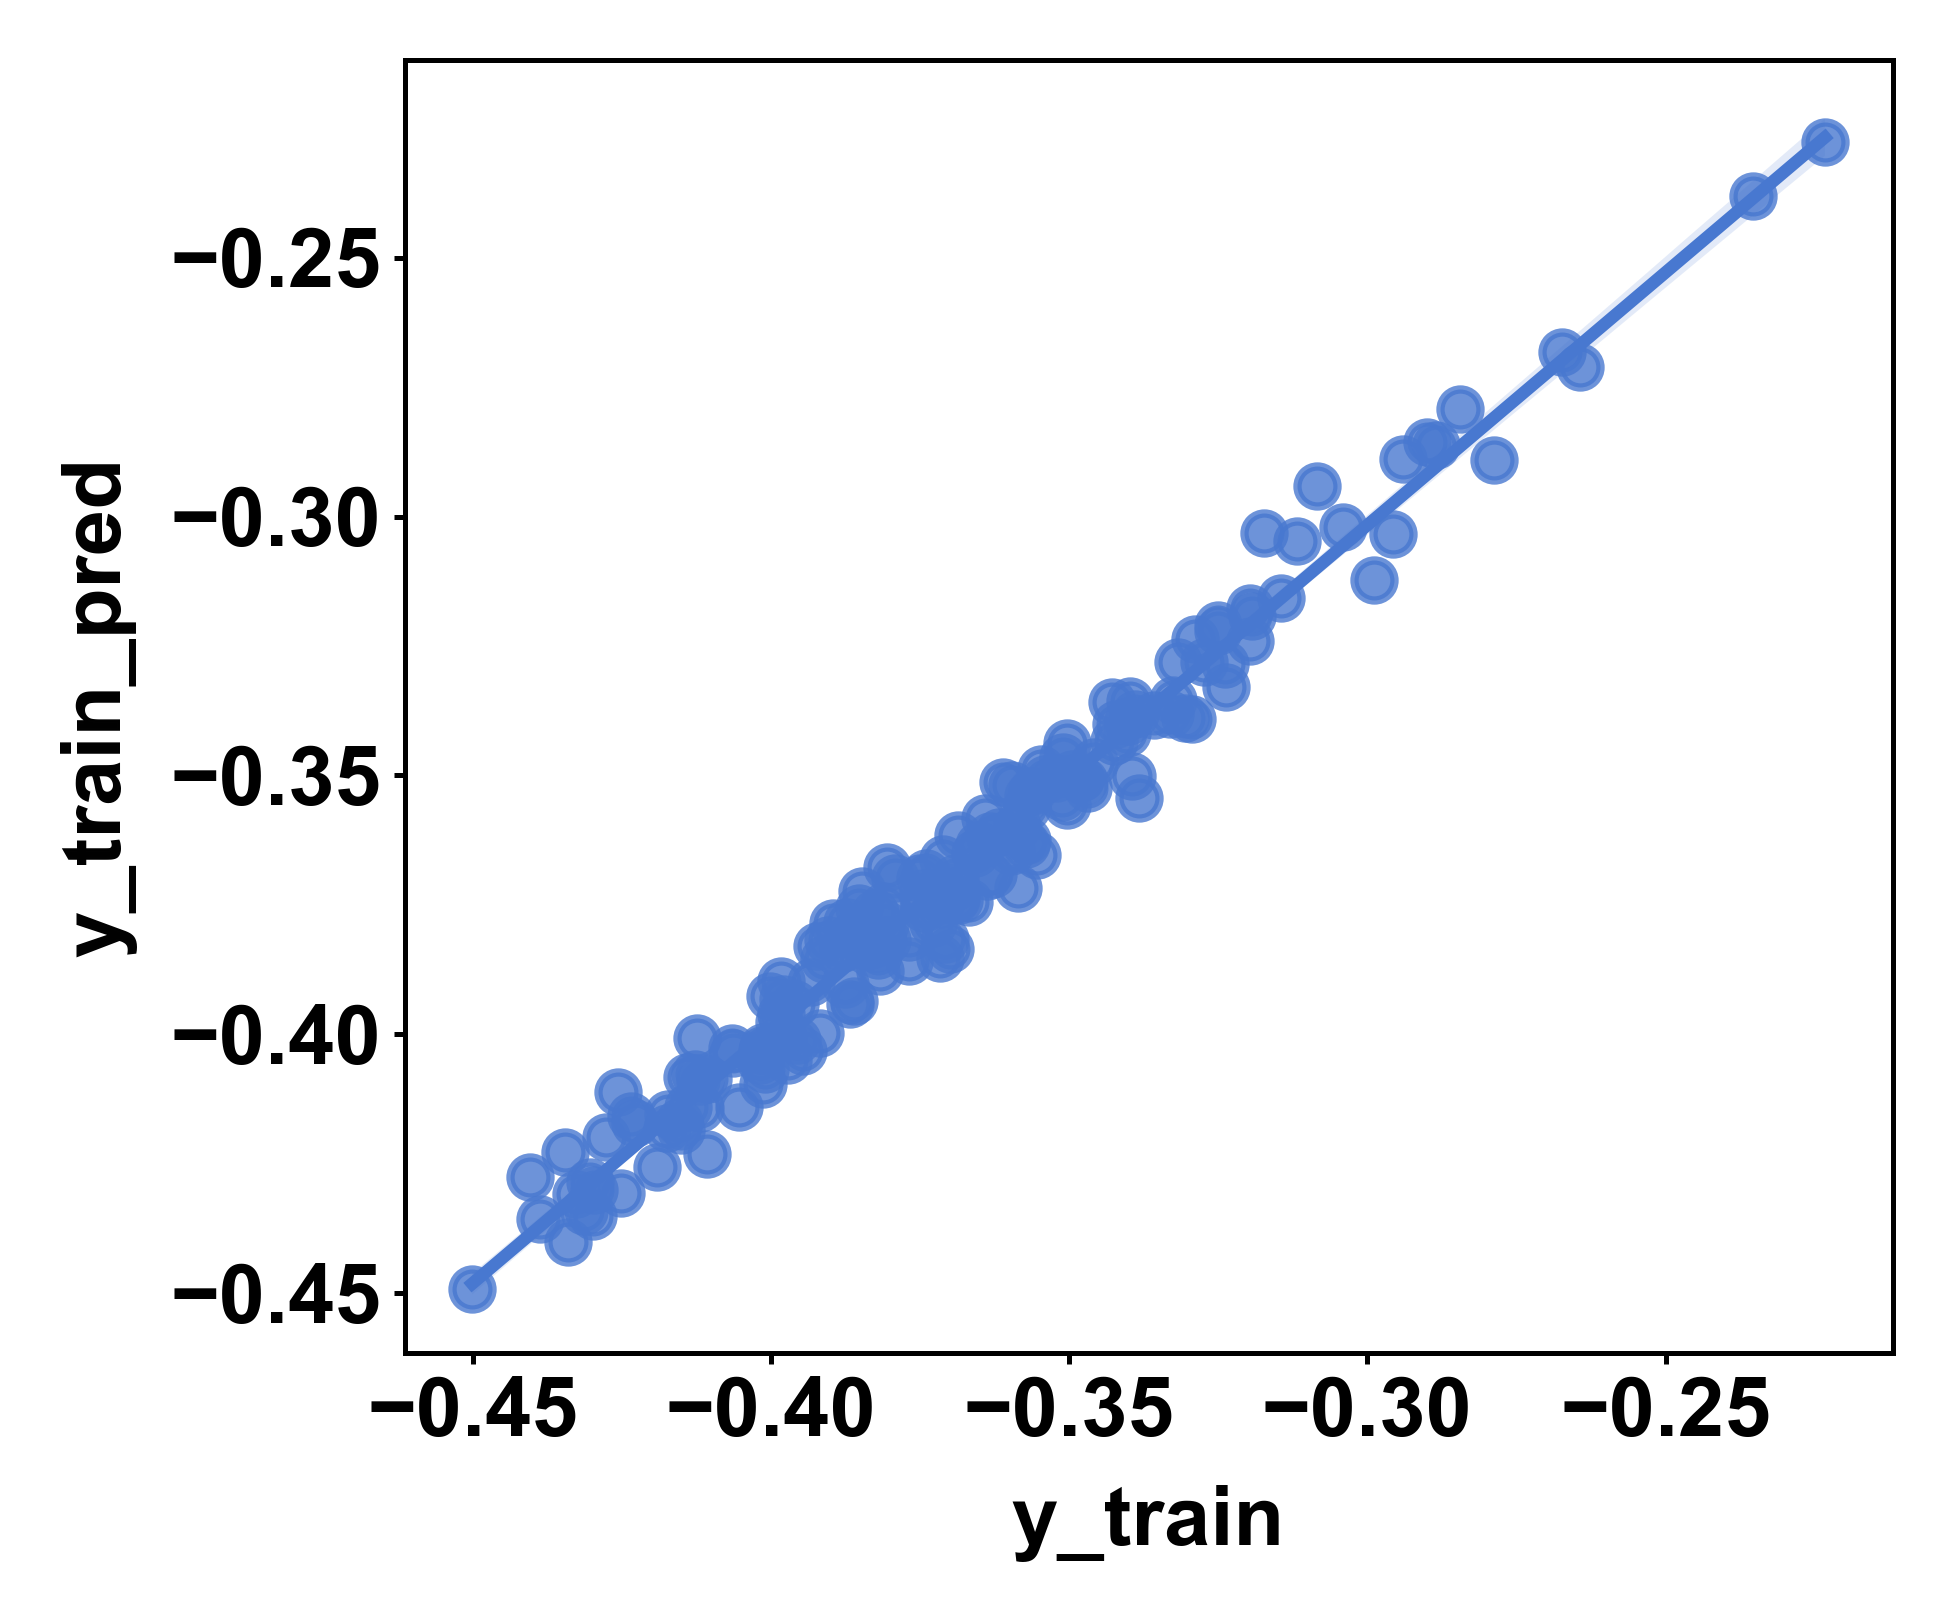

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

max_index=final_max_r2_index

X_train_best,X_test_best,y_train_best,y_test_best = train_test_split(X_all,y_all,test_size=0.2,shuffle=True,random_state=max_index)


scaler_best = StandardScaler()
scaler_best.fit(X_train_best)
X_train_best_standard = scaler_best.transform(X_train_best)
X_test_best_standard = scaler_best.transform(X_test_best)
X_final_test_standard_best = scaler_best.transform(X_final_test)


RI_best = Ridge(alpha=float(list(max_data.keys())[0]))
RI_best.fit(X_train_best_standard, y_train_best)
y_train_best_pred=RI_best.predict(X_train_best_standard)

x_best_1,y_best_1=pd.Series(y_train_best,name='y_train'),pd.Series(y_train_best_pred,name='y_train_pred')
sns.regplot(x=x_best_1,y=y_best_1)
plt.show

#rmse_log = np.sqrt(mean_squared_error(np.log(y_test),np.log(abs(y_pred))))
rmse = np.sqrt(mean_squared_error(y_train_best, y_train_best_pred))
r2 = r2_score(y_train_best, y_train_best_pred)


print(f'train Mean Absolute Error MAE: {mean_absolute_error(y_train_best,y_train_best_pred)}')
print ('train rmse scores : ',rmse)
print ('train R2 scores : ',r2)

test Mean Absolute Error MAE: 0.0070229496056722854
test rmse scores :  0.008418272386027116
test R2 scores :  0.9523927677398236


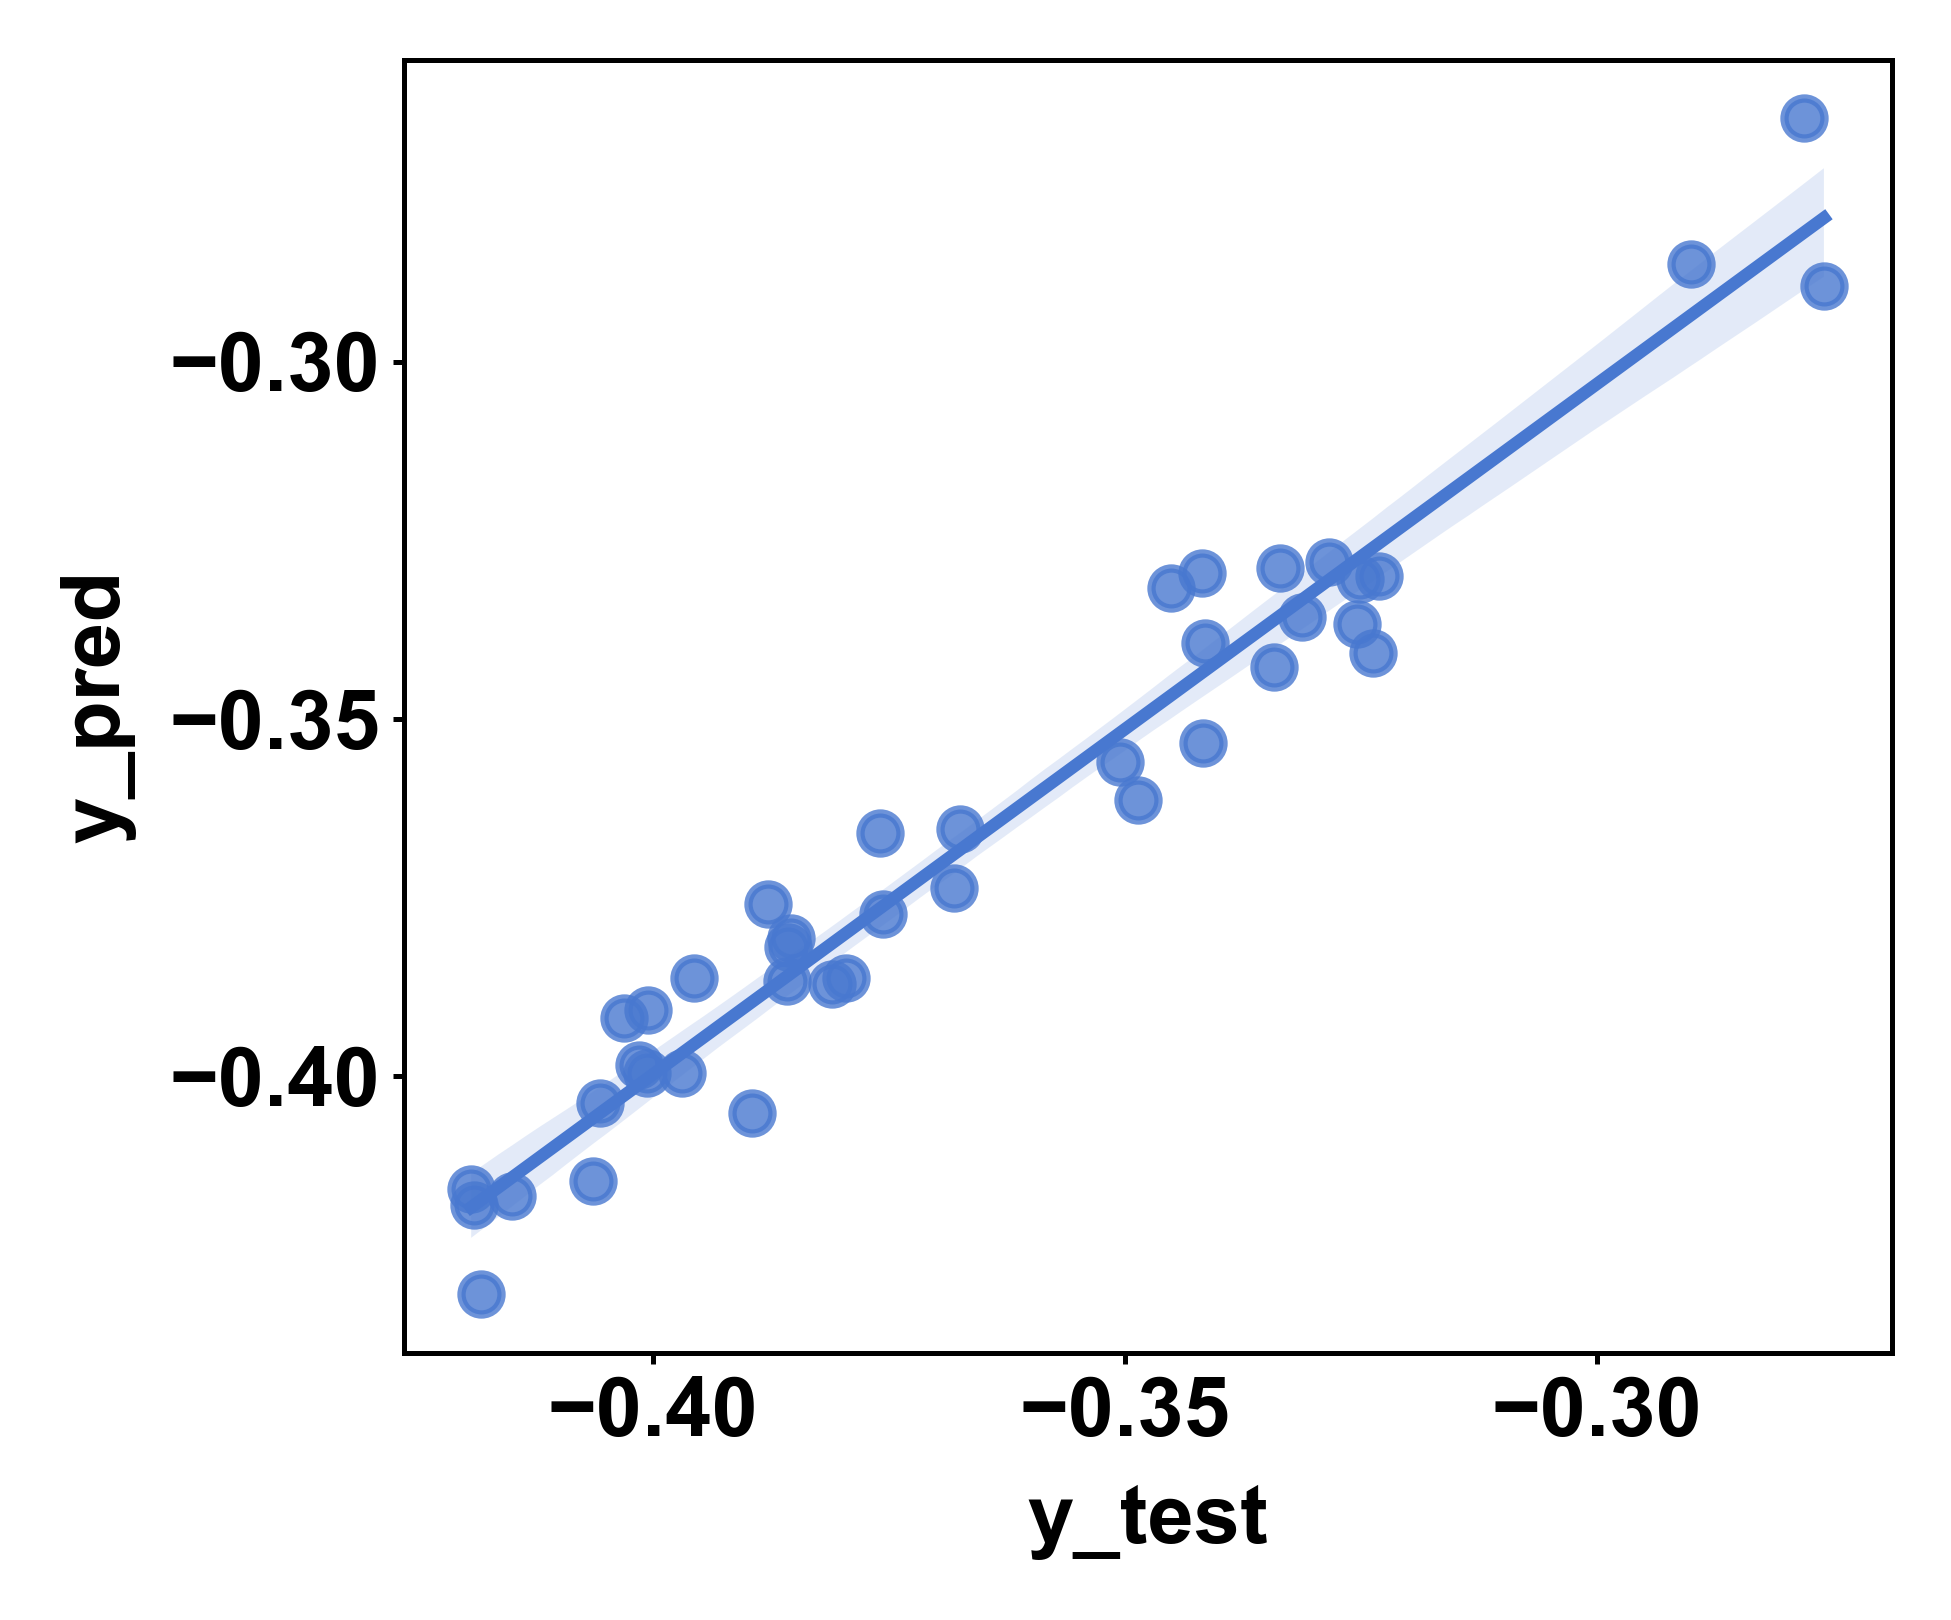

In [16]:

y_test_best_pred=RI_best.predict(X_test_best_standard)


x_best_2,y_best_2=pd.Series(y_test_best,name='y_test'),pd.Series(y_test_best_pred,name='y_pred')
sns.regplot(x=x_best_2,y=y_best_2)
plt.show

rmse = np.sqrt(mean_squared_error(y_test_best,y_test_best_pred))
r2 = r2_score(y_test_best,y_test_best_pred)


print(f'test Mean Absolute Error MAE: {mean_absolute_error(y_test_best,y_test_best_pred)}')
print ('test rmse scores : ',rmse)
print ('test R2 scores : ',r2)

test Mean Absolute Error MAE: 0.005736811845400387
test rmse scores :  0.007412529752917428
test R2 scores :  0.920991495807161


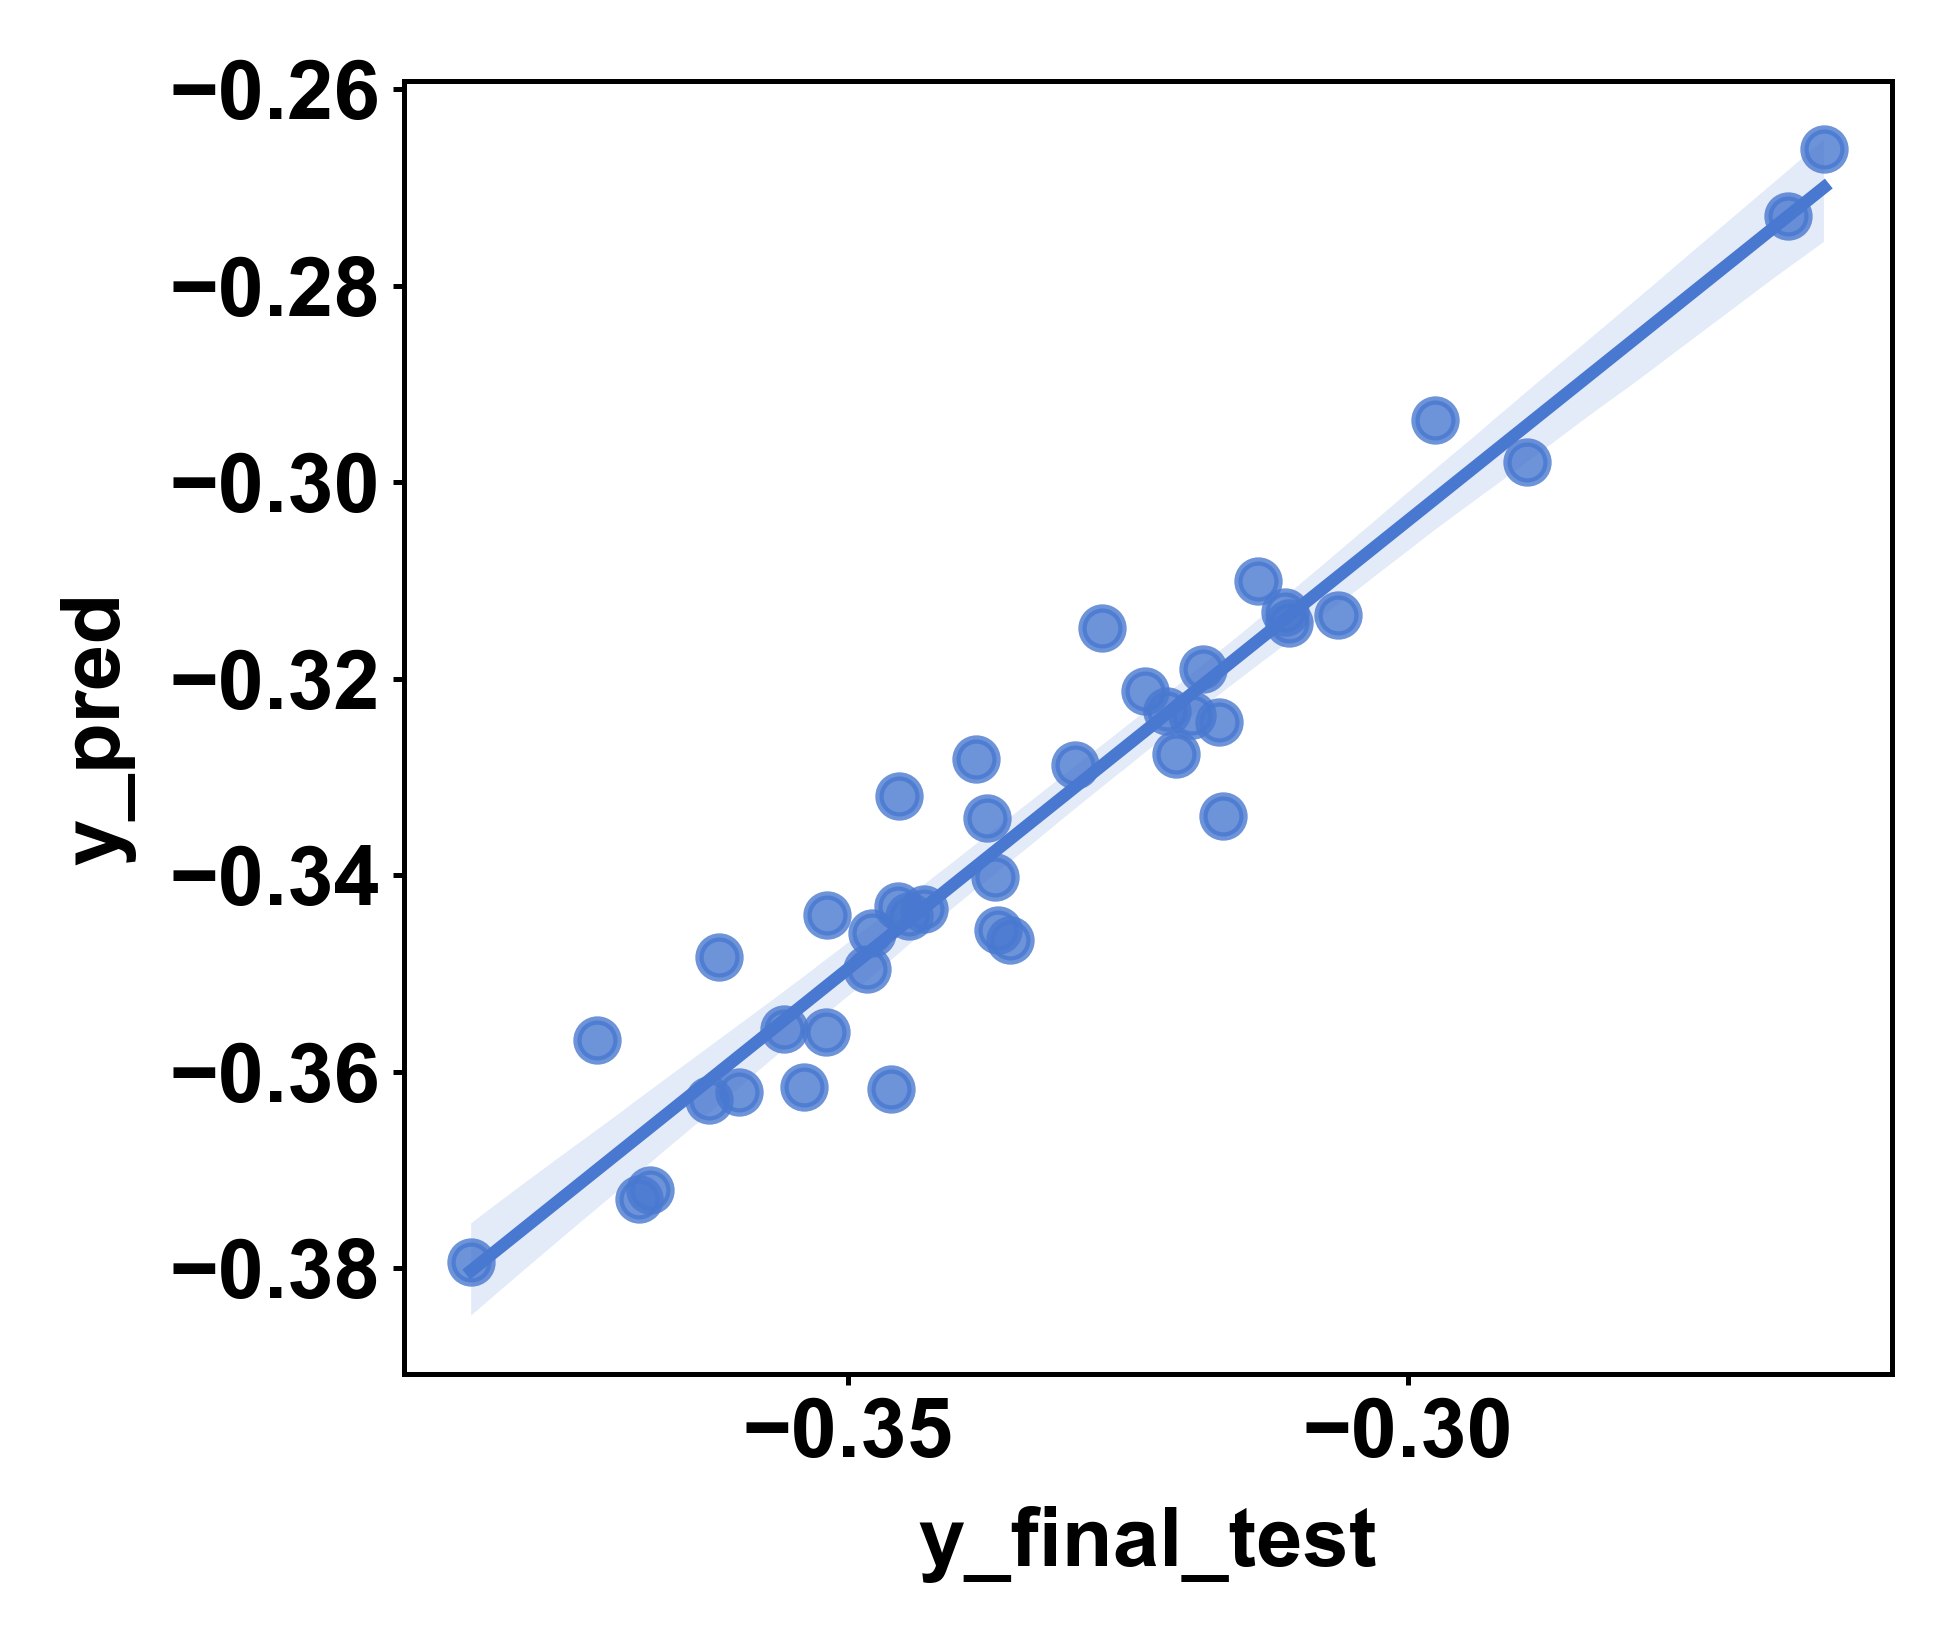

In [17]:

y_final_test_best_pred=RI_best.predict(X_final_test_standard_best)


x_best_3,y_best_3=pd.Series(y_final_test_np,name='y_final_test'),pd.Series(y_final_test_best_pred,name='y_pred')
sns.regplot(x=x_best_3,y=y_best_3)
plt.show

rmse = np.sqrt(mean_squared_error(y_final_test_np,y_final_test_best_pred))
r2 = r2_score(y_final_test_np,y_final_test_best_pred)


print(f'test Mean Absolute Error MAE: {mean_absolute_error(y_final_test_np,y_final_test_best_pred)}')
print ('test rmse scores : ',rmse)
print ('test R2 scores : ',r2)